In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
MyDataSet=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
MyDataSet.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [4]:
MyDataSet=MyDataSet.drop(['Unnamed: 0'],axis=1)

In [5]:
confidence_level = 0.05
MyDataSet['VaR_5_percent'] = MyDataSet['oil_return'].rolling(window=10).quantile(confidence_level)

In [6]:
MyDataSet['return_lag_1'] = MyDataSet['oil_return'].shift(1)
MyDataSet['return_lag_2'] = MyDataSet['oil_return'].shift(2)
MyDataSet['return_lag_3'] = MyDataSet['oil_return'].shift(3)

In [7]:
MyDataSet['VaR_5_percent_lag1'] = MyDataSet['VaR_5_percent'].shift(1)
MyDataSet['VaR_5_percent_lag2'] = MyDataSet['VaR_5_percent'].shift(2)
MyDataSet['VaR_5_percent_lag3'] = MyDataSet['VaR_5_percent'].shift(3)

In [8]:
MyDataSet.dropna(inplace=True)

In [9]:
X = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis= 1)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [10]:
X_var = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis= 1)
scaler = StandardScaler()
X_var=scaler.fit_transform(X_var)

In [11]:
Y=MyDataSet['oil_return']
Y_var=MyDataSet['VaR_5_percent']

In [12]:
threshold = np.median(Y)
threshold_var=np.median(Y_var)

In [13]:
Y_binary = (Y> threshold).astype(int)
Y_binary_var=(Y_var> threshold_var).astype(int)

In [14]:
print(X_var.shape)
print(X.shape)
print(Y_var.shape)
print(Y.shape)

(6001, 7)
(6001, 7)
(6001,)
(6001,)


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_binary,test_size =0.3)
x_train_var,x_test_var,y_train_var,y_test_var = train_test_split(X_var,Y_binary_var,test_size =0.3)
print(x_train.shape)
print(y_train.shape)
print(x_train_var.shape)
print(y_train_var.shape)

(4200, 7)
(4200,)
(4200, 7)
(4200,)


In [17]:
MyDT=DecisionTreeClassifier(criterion='entropy', 
                            splitter='best',  
                            max_depth=10, 
                            min_samples_split=5, 
                            min_samples_leaf=2,
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=42, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [18]:
MyDT_var=DecisionTreeClassifier(criterion='entropy', 
                            splitter='best',  
                            max_depth=10, 
                            min_samples_split=5, 
                            min_samples_leaf=2,
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=42, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [19]:
MyDT.fit(x_train, y_train)
MyDT_var.fit(x_train_var, y_train_var)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

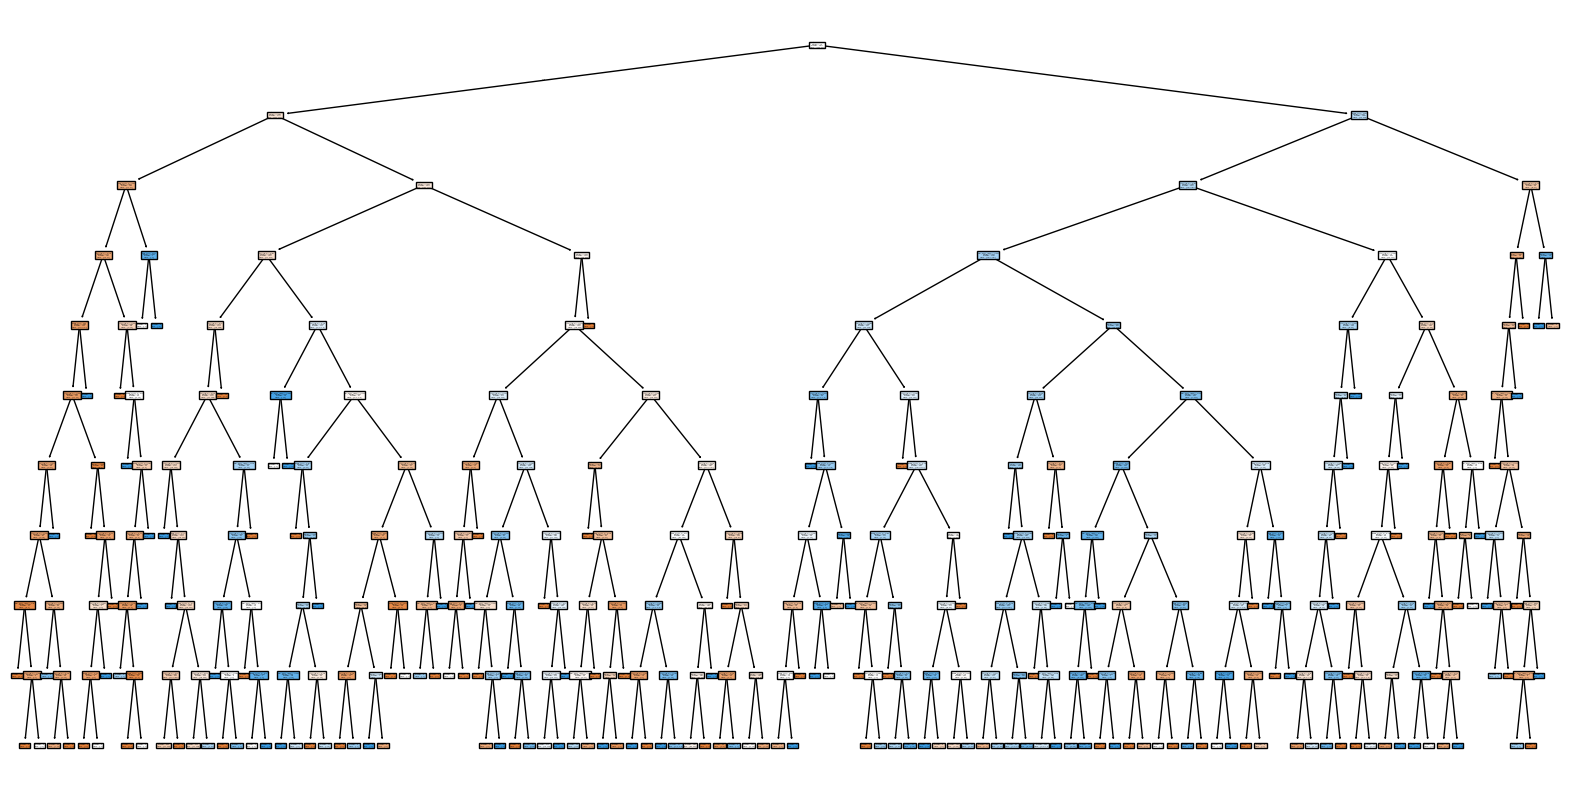

In [20]:
plt.figure(figsize=(20, 10))
tree.plot_tree(MyDT,filled=True, feature_names=MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis=1).columns)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(MyDT_var,filled=True, feature_names=MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis=1).columns)
plt.show()

In [21]:
DT_pred=MyDT.predict(x_test)
print(DT_pred)
DT_pred_var=MyDT_var.predict(x_test_var)
print(DT_pred_var)

[0 0 1 ... 0 0 1]
[0 1 0 ... 0 1 1]


In [22]:
accuracy = accuracy_score(y_test, DT_pred)
print("Accuracy:", accuracy)
accuracy_var = accuracy_score(y_test_var, DT_pred_var)
print("Accuracy for var:", accuracy_var)

Accuracy: 0.5474736257634647
Accuracy for var: 0.9094947251526929


In [23]:
dt_matrix = confusion_matrix(y_test, DT_pred)
print("\nThe confusion matrix is:")
print(dt_matrix)


The confusion matrix is:
[[569 332]
 [483 417]]


<Axes: >

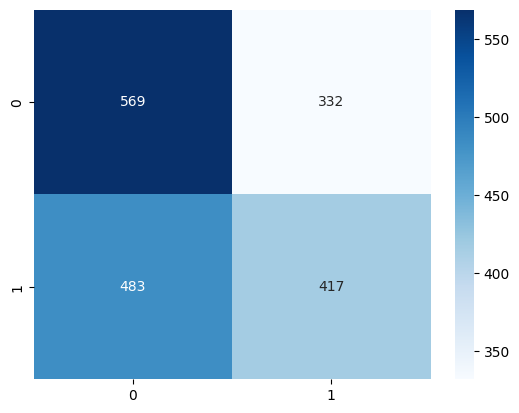

In [28]:
sns.heatmap(dt_matrix, annot=True,fmt='g' , cmap='Blues')

In [24]:
dt_matrix_var = confusion_matrix(y_test_var, DT_pred_var)
print("\nThe confusion matrix is:")
print(dt_matrix_var)


The confusion matrix is:
[[827  74]
 [ 89 811]]


<Axes: >

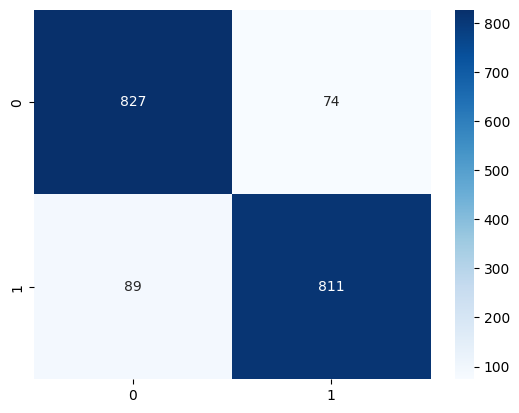

In [29]:
sns.heatmap(dt_matrix_var, annot=True,fmt='g' , cmap='Blues')

In [25]:
## Feature Importance
FeatureImpR=MyDT.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
feature_namesR = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','VaR_5_percent_lag1','VaR_5_percent_lag2','VaR_5_percent_lag3'], axis=1).columns
print("Feature importances:")
for f in range(len(feature_namesR)):
    print(f"{f + 1}. feature: {feature_namesR[indicesR[f]]} ({FeatureImpR[indicesR[f]]:.6f})")

Feature importances:
1. feature: sprtrn (0.255906)
2. feature: return_lag_3 (0.163564)
3. feature: return_lag_2 (0.136079)
4. feature: return_lag_1 (0.135878)
5. feature: GPRD_THREAT (0.105533)
6. feature: daily_policy_index (0.102798)
7. feature: GPRD_ACT (0.100242)


In [26]:
FeatureImpR_var=MyDT_var.feature_importances_   
indicesR_var = np.argsort(FeatureImpR_var)[::-1]
indicesR_var
feature_namesR_var = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent','return_lag_1','return_lag_2','return_lag_3'], axis=1).columns
print("Feature importances:")
for f in range(len(feature_namesR_var)):
    print(f"{f + 1}. feature: {feature_namesR_var[indicesR_var[f]]} ({FeatureImpR_var[indicesR_var[f]]:.6f})")

Feature importances:
1. feature: VaR_5_percent_lag1 (0.851127)
2. feature: GPRD_THREAT (0.032918)
3. feature: daily_policy_index (0.028916)
4. feature: VaR_5_percent_lag3 (0.024456)
5. feature: sprtrn (0.021410)
6. feature: VaR_5_percent_lag2 (0.020615)
7. feature: GPRD_ACT (0.020557)
